# <font color="#4863A0"> Import Necessary Libraries📦</font>
This comment indicates that we are importing the necessary libraries for our machine learning code. These libraries include **pandas**, **numpy**, **matplotlib**, **seaborn**, and **scikit-learn**, which are commonly used for *data manipulation*, *analysis*, *visualization*, and *machine learning algorithms*.

In [1]:
# Standard library imports
import warnings # For warning handling

# Third-party imports
import pandas as pd # For data processing, CSV file I/O
import numpy as np # For numerical operations and mathematical functions
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For statistical graphics
import plotly.express as px # For interactive plotting
from sklearn.model_selection import train_test_split # For data splitting for machine learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler # For feature standardization
from sklearn.metrics import accuracy_score # For model evaluation
from termcolor import colored # For colored text printing
from sklearn.ensemble import RandomForestClassifier # For random forest classifier model

# For warning handling
warnings.filterwarnings('ignore') # For ignoring warnings

# Printing a success message in green color
print(colored("THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...", "green", attrs=['reverse']))

THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...


# <font color="#4863A0"> Load The Dataset🔃</font>
This comment indicates that we are loading the **"winequality-red,The world's best wine producers"** dataset into our program. The dataset will be stored in a pandas DataFrame called **"data"**.

In [2]:
# load data
try:
    # Relative file path
    filePath = r"E:\Computer Science AOU\Third year-S2\Machine Learning\Final Project\Datasets\Adham Dataset\winequality-red.csv"
    
    # Read the CSV file and save it in "data" variable
    data= pd.read_csv(filePath)
    
    # Check loading data
    print(colored("THE DATASET LOADED SUCCESSFULLY...", "green", attrs=['reverse']))

except FileNotFoundError:
    print(colored("ERROR: File not found!", "red", attrs=['reverse']))

except Exception as e:
    print(colored(f"ERROR: {e}", "red", attrs=['reverse']))

THE DATASET LOADED SUCCESSFULLY...


# <font color="#4863A0"> Initial Information About The Dataset 🧪</font>
This comment signifies that we are going to display initial information of the dataset to get a glimpse of the data's structure and values.
- Displaying the first few rows of the dataset to get a glimpse of the data.
- Checking the shape of the dataset (number of rows and columns).
- Exploring the column names and data types.
- Perform descriptive analytics on the dataset, which includes statistical measures.

In [3]:
# Displaying the first 7 rows.
dataset_rows = data.head(7) #.head() the default value = 5

print(colored('As you can see, the first 7 rows in the dataset:\n', 'green', attrs=['reverse']))

# Iterate over each row in the dataset_rows DataFrame
for index, row in dataset_rows.iterrows():
    # Print the index label of the current row
    print(colored(f"Row {index + 1}:","white",attrs=['reverse']))
    
    # Print the content of the current row
    print(row)
    
    # Print a separator line
    print("--------------------------------------")
    

# .iterrows() function:
# Returns: (index, data|row|series)
#     Index: the index of the row.
#     Data: the data of the row as a series.
# Note: The column names will also be returned, in addition to the specified rows.

As you can see, the first 7 rows in the dataset:

Row 1:
fixed acidity            7.4000
volatile acidity         0.7000
citric acid              0.0000
residual sugar           1.9000
chlorides                0.0760
free sulfur dioxide     11.0000
total sulfur dioxide    34.0000
density                  0.9978
pH                       3.5100
sulphates                0.5600
alcohol                  9.4000
quality                  5.0000
Name: 0, dtype: float64
--------------------------------------
Row 2:
fixed acidity            7.8000
volatile acidity         0.8800
citric acid              0.0000
residual sugar           2.6000
chlorides                0.0980
free sulfur dioxide     25.0000
total sulfur dioxide    67.0000
density                  0.9968
pH                       3.2000
sulphates                0.6800
alcohol                  9.8000
quality                  5.0000
Name: 1, dtype: float64
--------------------------------------
Row 3:
fixed acidity            7.800
vola

In [4]:
# Show the shape of the dataset
print("The shape =",data.shape)

# Show information about the dataset
num_rows, num_cols = data.shape
num_features = num_cols - 1
num_data = num_rows * num_cols

# Print the information
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")

# Check and ensure running
print(colored("The task has been completed without any errors....","green", attrs=['reverse']))

The shape = (1599, 12)
Number of Rows: 1599
Number of Columns: 12
Number of Features: 11
Number of All Data: 19188
The task has been completed without any errors....


In [5]:
# Get basic information
print(data.info())

# Check and ensure running
print(colored("The task has been completed without any errors....","green", attrs=['reverse']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
The task has been completed without any errors....


In [6]:
# Descriptive Statistics of Numeric Variables
data.describe().T.round(2)

count   mean    std   min    25%    50%    75%     max
fixed acidity         1599.0   8.32   1.74  4.60   7.10   7.90   9.20   15.90
volatile acidity      1599.0   0.53   0.18  0.12   0.39   0.52   0.64    1.58
citric acid           1599.0   0.27   0.19  0.00   0.09   0.26   0.42    1.00
residual sugar        1599.0   2.54   1.41  0.90   1.90   2.20   2.60   15.50
chlorides             1599.0   0.09   0.05  0.01   0.07   0.08   0.09    0.61
free sulfur dioxide   1599.0  15.87  10.46  1.00   7.00  14.00  21.00   72.00
total sulfur dioxide  1599.0  46.47  32.90  6.00  22.00  38.00  62.00  289.00
density               1599.0   1.00   0.00  0.99   1.00   1.00   1.00    1.00
pH                    1599.0   3.31   0.15  2.74   3.21   3.31   3.40    4.01
sulphates             1599.0   0.66   0.17  0.33   0.55   0.62   0.73    2.00
alcohol               1599.0  10.42   1.07  8.40   9.50  10.20  11.10   14.90
quality               1599.0   5.64   0.81  3.00   5.00   6.00   6.00    8.00

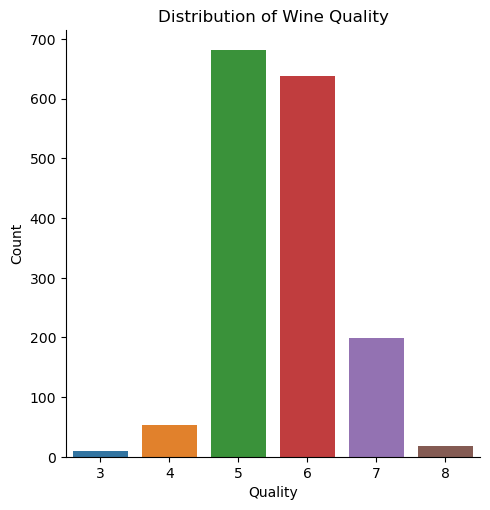

In [7]:
# Create a count plot using seaborn
sns.catplot(data=data, x='quality', kind='count')

# Add labels and title to the plot
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

# Display the plot
plt.show()

<font size=4 face="WildWest">Another Graph</font>

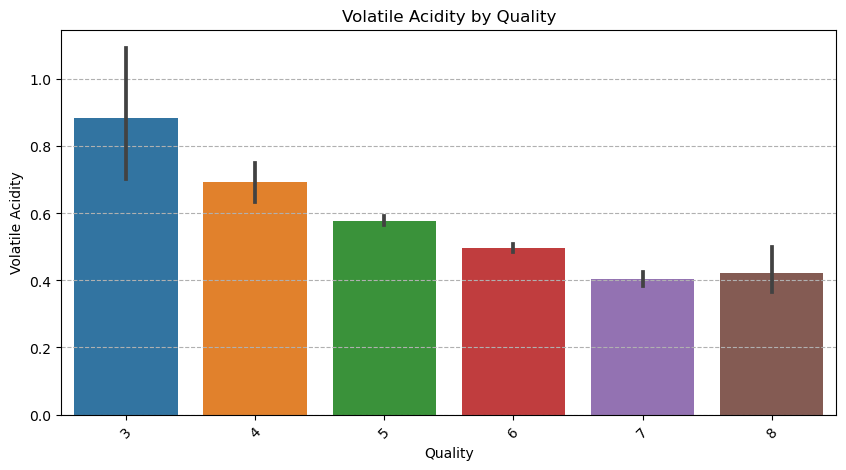

In [8]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bar chart
sns.barplot(x='quality', y='volatile acidity', data=data, ax=ax)

# Set plot title and axis labels
ax.set_title('Volatile Acidity by Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')

# Customize plot aesthetics
ax.grid(True, axis='y', linestyle='--')
sns.set_palette('dark')  # Change color palette
plt.xticks(rotation=45)  # Rotate x-axis labels

# Display the plo
plt.show()

<font size=4 face="WildWest">Another Graph</font>

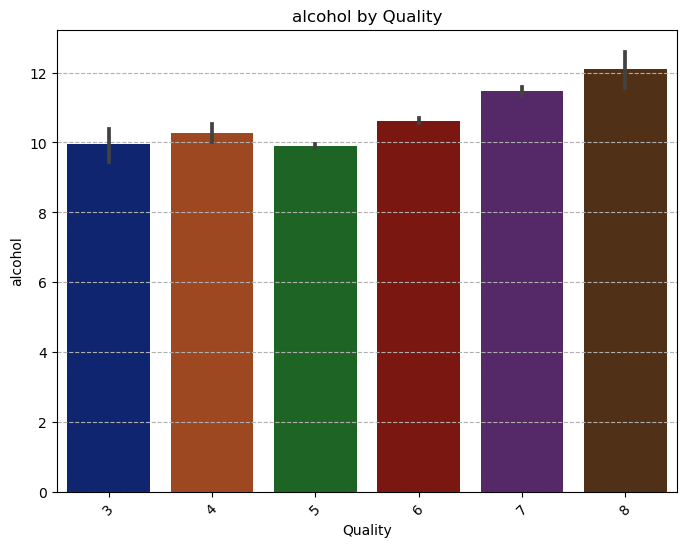

In [9]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar chart
sns.barplot(x='quality', y='alcohol', data=data, ax=ax)

# Set plot title and axis labels
ax.set_title('alcohol by Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('alcohol')

# Customize plot aesthetics
ax.grid(True, axis='y', linestyle='--')
sns.set_palette('dark')  # Change color palette
plt.xticks(rotation=45)  # Rotate x-axis labels

# Display the plot
plt.show()

# <font color=#4863A0> Data Cleaning 🧹</font>
Data cleaning refers to the process of **identifying**, **correcting**, and **removing errors**, **inconsistencies**, and **inaccuracies** from a dataset. It involves transforming raw data into a clean and structured format that is suitable for analysis, modeling, and other data-related tasks, including:
- Handling Missing Values
- Handling Outliers
- Handling Duplicates

<font size="4" face="WildWest">1. Handling Missing Values</font>

In [10]:
# Check for missing values
null_counts = data.isnull().sum() 

# Display the number of null values
print(null_counts)

print("_________________________________________________________________")
print(colored(f"Totally, there are {null_counts.sum()} null values in the dataset.","green", attrs=['reverse']))

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
_________________________________________________________________
Totally, there are 0 null values in the dataset.


<font size="4" face="WildWest">2. Handling Outliers</font>

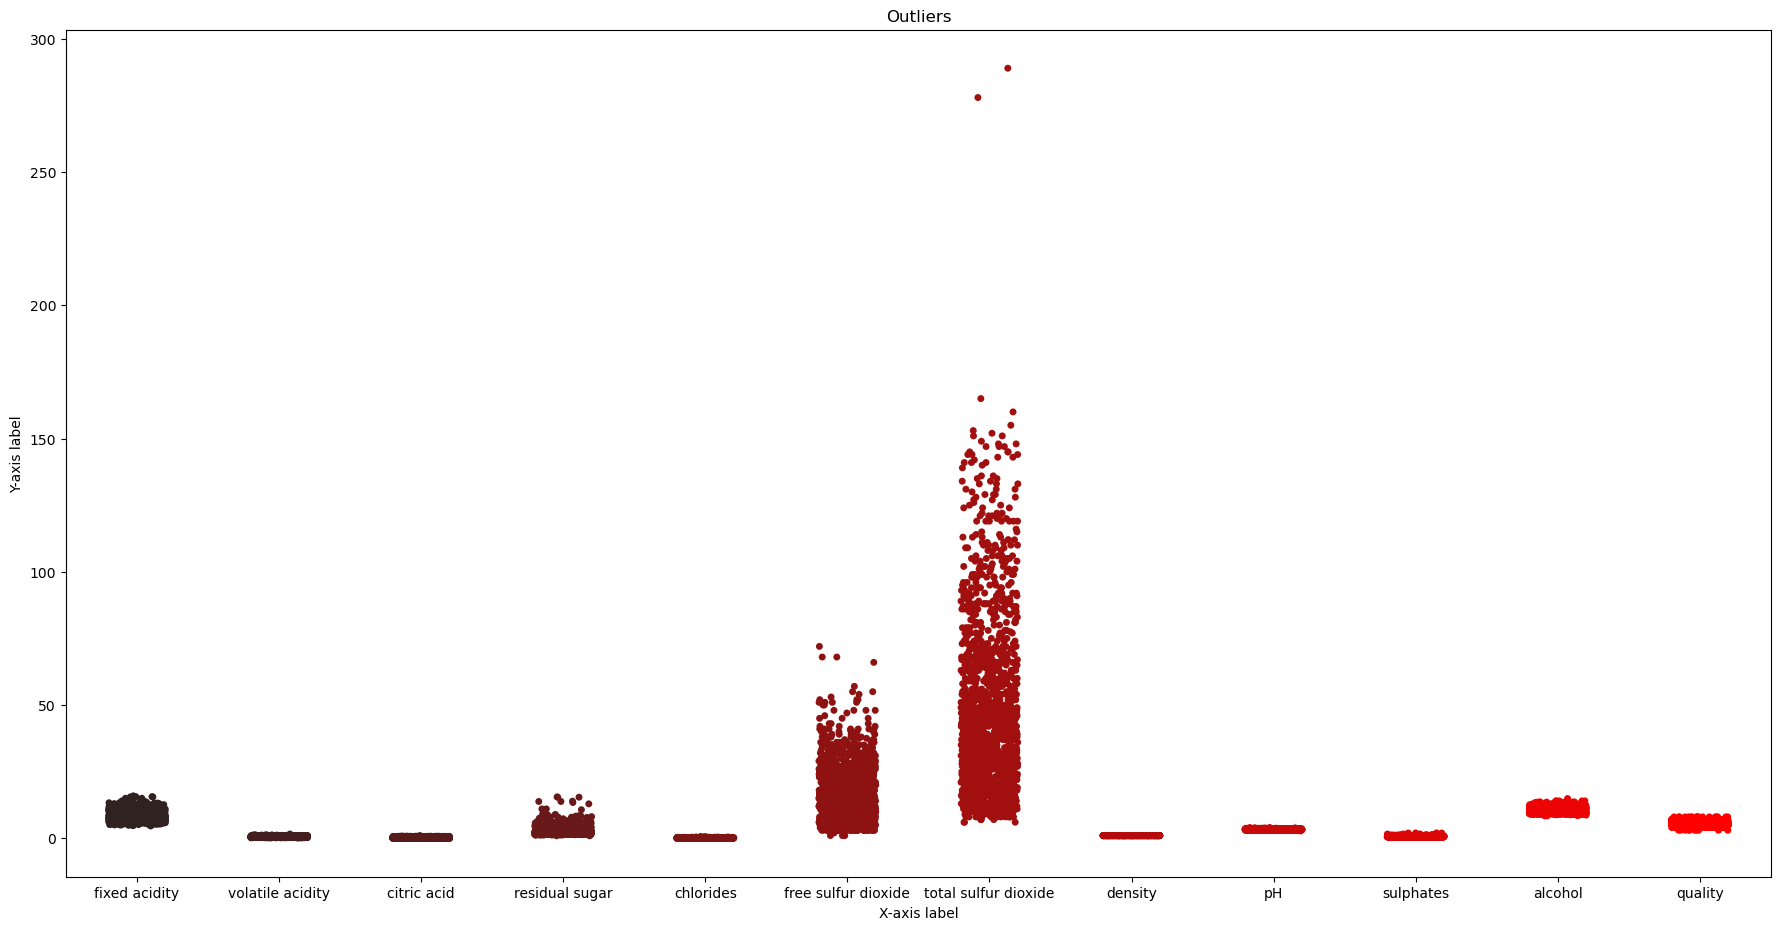

In [11]:
# Set the figure size
plt.figure(figsize=(22, 11))

# Add outliers to the plot
sns.stripplot(data=data, color="red", jitter=0.2, size=5)

# Set the axis labels and title
plt.title("Outliers")
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")

# Show the plot
plt.show()

In [12]:
# Delete the outliers
# The data before deleting outliers 
print("Before Removing the outliers", data.shape)

# Deleting outliers (Removing the number of observation where the total sulfur dioxide is more than 160)
data = data[data['total sulfur dioxide']<160]

#The data after deleting outliers
print("After Removing the outliers", data.shape)

Before Removing the outliers (1599, 12)
After Removing the outliers (1595, 12)


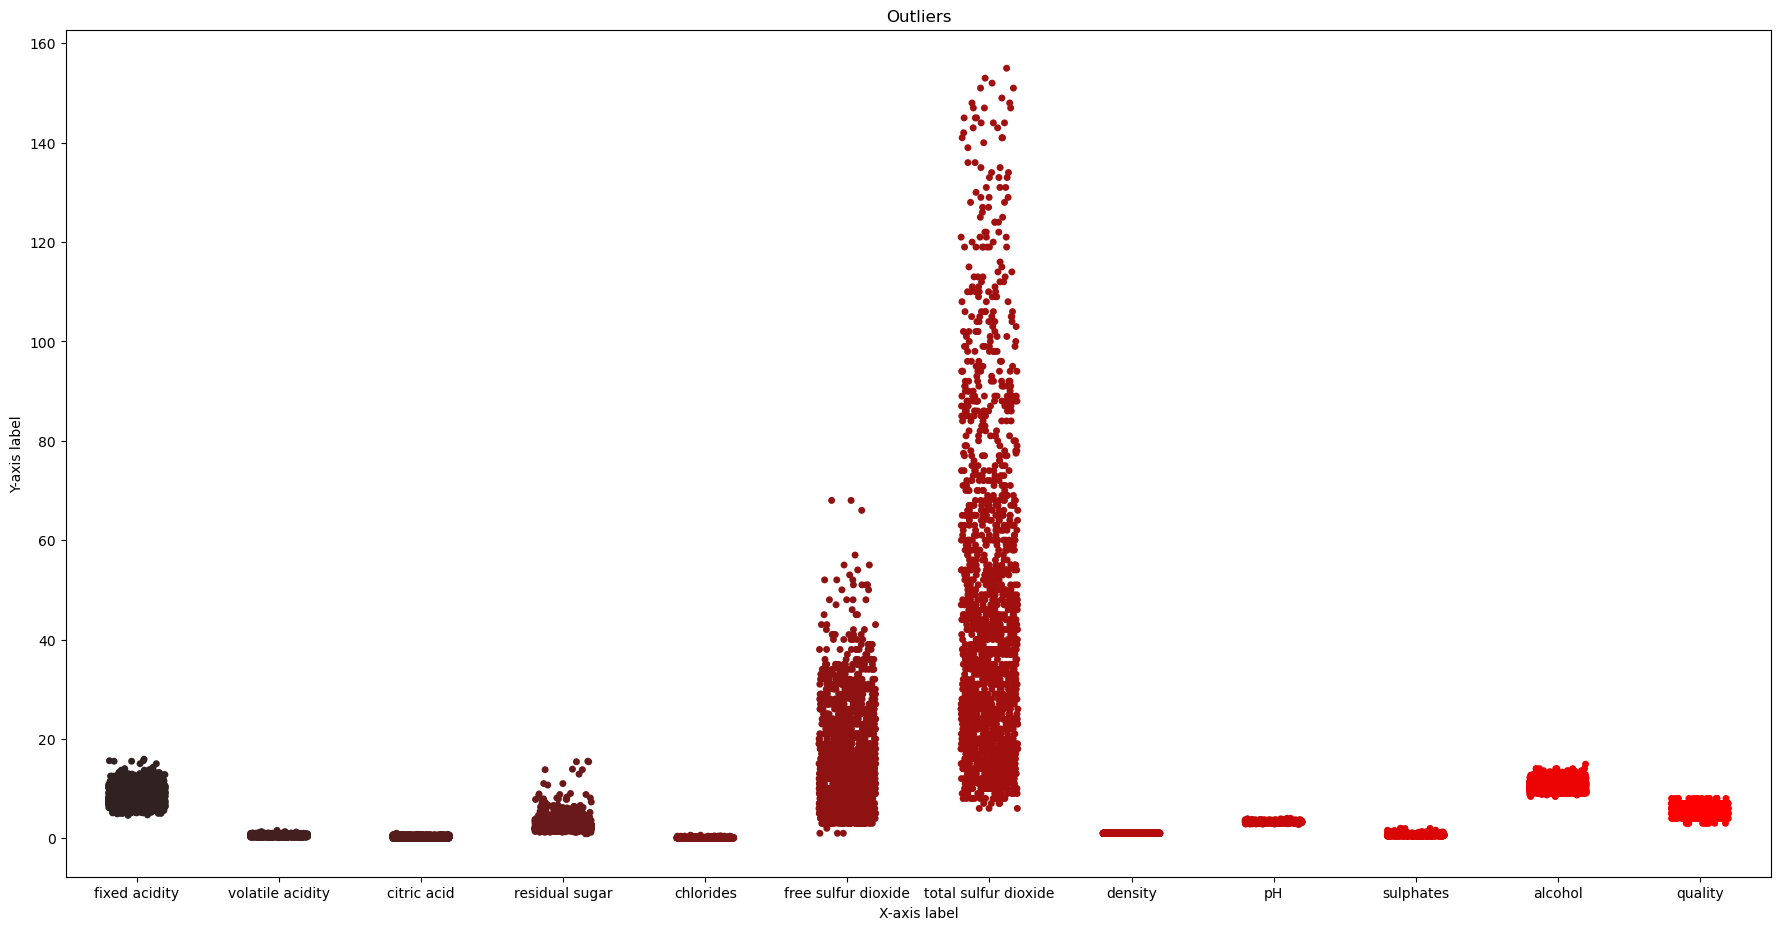

In [13]:
# Set the figure size
plt.figure(figsize=(22, 11))

# Add outliers to the plot
sns.stripplot(data=data, color="red", jitter=0.2, size=5)

# Set the axis labels and title
plt.title("Outliers")
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")

# Show the plot
plt.show()

<font size=4 face="WildWest">Another Graph</font>

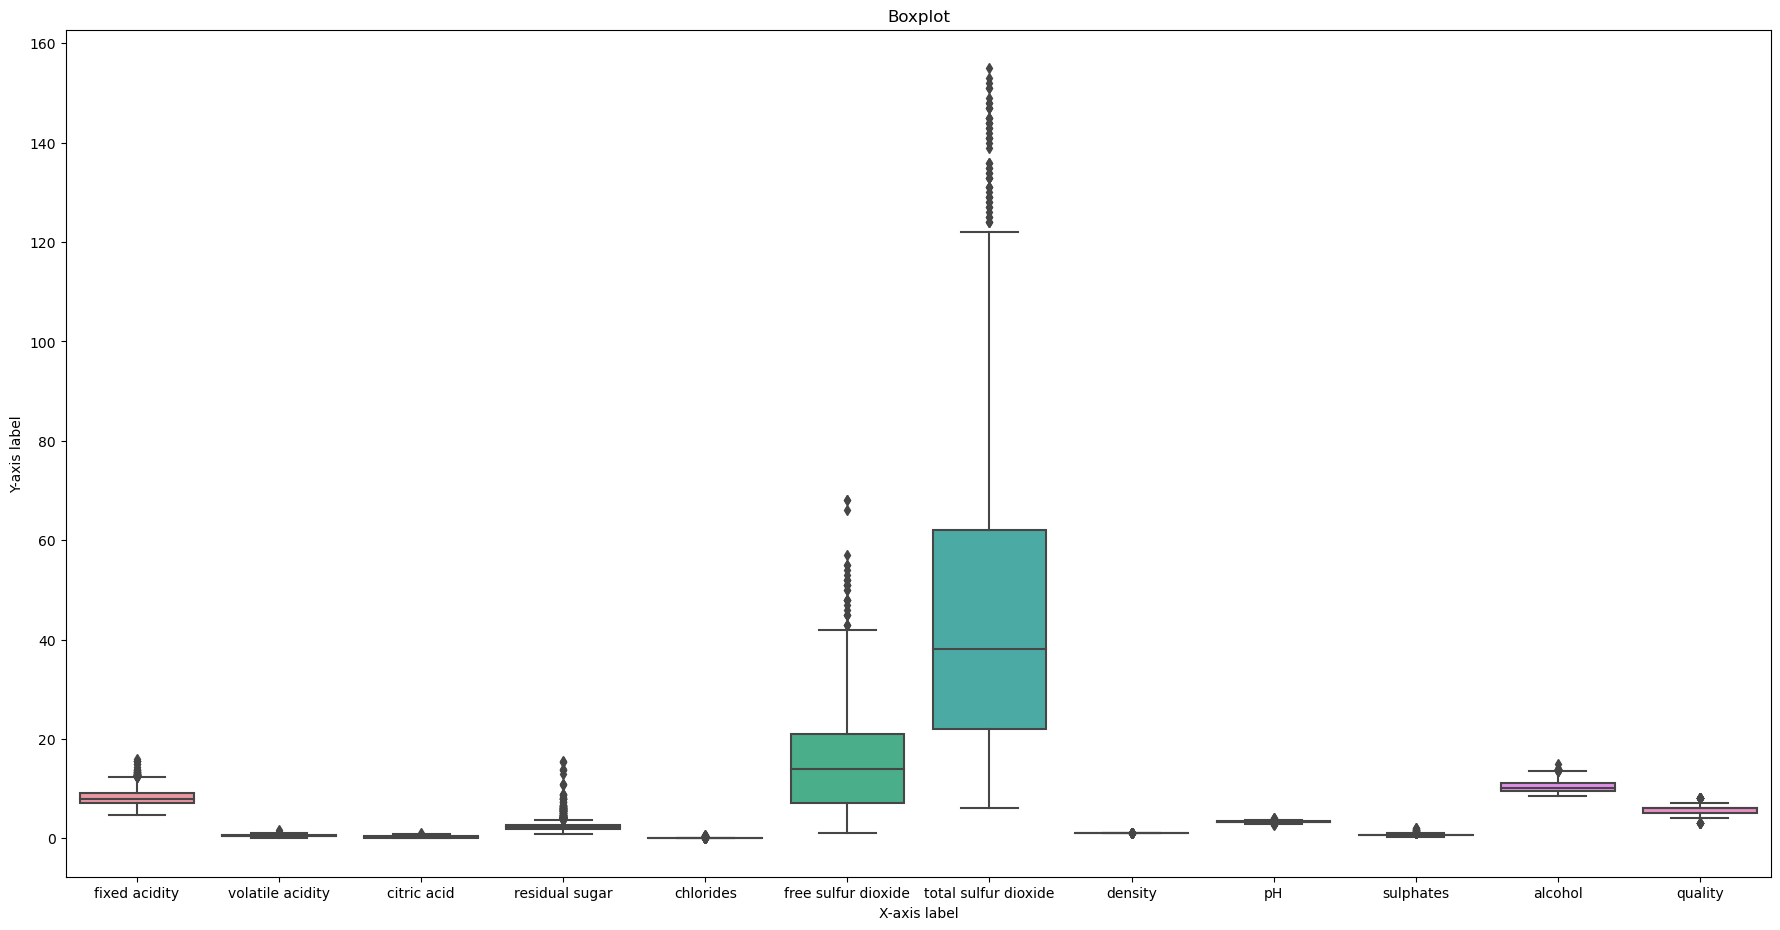

In [14]:
# Set the figure size
plt.figure(figsize=(22, 11))

# Plot the boxplot
sns.boxplot(data=data)

# Set the axis labels and title
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.title("Boxplot")

# Show the plot
plt.show()

<font size="4" face="WildWest">3. Handling Duplicates</font>

In [15]:
# Checking for duplicate entries
duplicate_count = data.duplicated().sum()

# Output the result with a descriptive message
if duplicate_count == 0:
    print(colored("No duplicate entries found in the dataset.","green", attrs=['reverse']))
else:
    print(colored(f"Number of duplicate entries found: {duplicate_count}","cyan", attrs=['bold']))

Number of duplicate entries found: 240


# <font color=#4863A0> Data Exploration 🔍</font>
Exploratory Data Analysis (EDA), is an essential step in the machine learning pipeline. It involves **examining** and **visualizing the characteristics of a dataset to gain insights**, **understand patterns**, **detect anomalies**, and **prepare the data for further analysis** and **modeling**. some common techniques used in data exploration:
- Graphical Analysis
- Statistical Summary
- Correlation Analysis

<font size="4" face="WildWest">1.  Graphical analysis</font>

In [16]:
# Group the data by country and calculate the mean of Total Cup Points
df = pd.read_csv(r"E:\Computer Science AOU\Third year-S2\Machine Learning\Final Project\Datasets\Adham Dataset\The best wine producers in the world.csv")

# For global exports
df_grouped = df.groupby('Country')['Global Exports'].mean().reset_index()
fig = px.choropleth(df_grouped, 
                    locations='Country', 
                    locationmode='country names',
                    hover_name='Country',
                    color='Global Exports',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title= "The world's best wine exports" )

fig.show()

# For global producers
df_grouped = df.groupby('Country')['Wine Produced (million hectolitres)'].mean().reset_index()
fig = px.choropleth(df_grouped, 
                    locations='Country', 
                    locationmode='country names',
                    hover_name='Country',
                    color='Wine Produced (million hectolitres)',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title= "The world's best wine producers" )

fig.show()

<font size=4 face="WildWest">Another Graph</font>

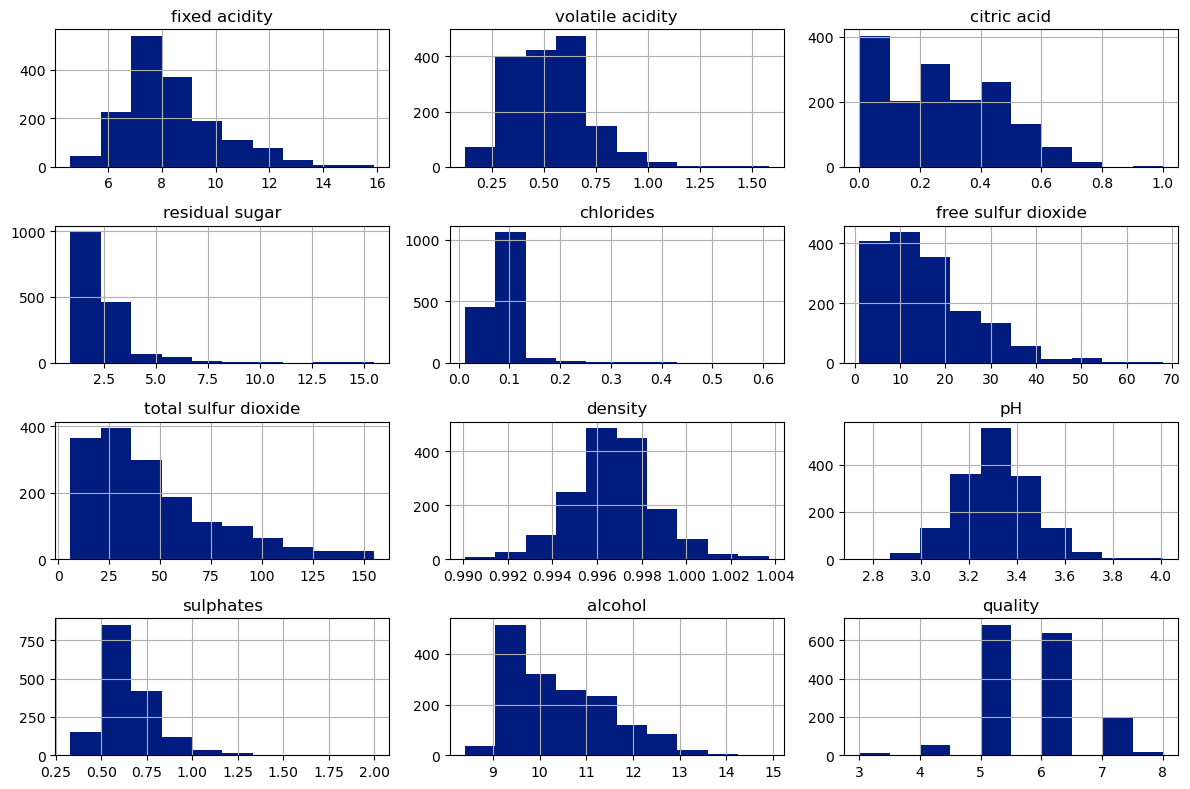

In [17]:
# Histograms
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

<font size=4 face="WildWest">Another Graph</font>

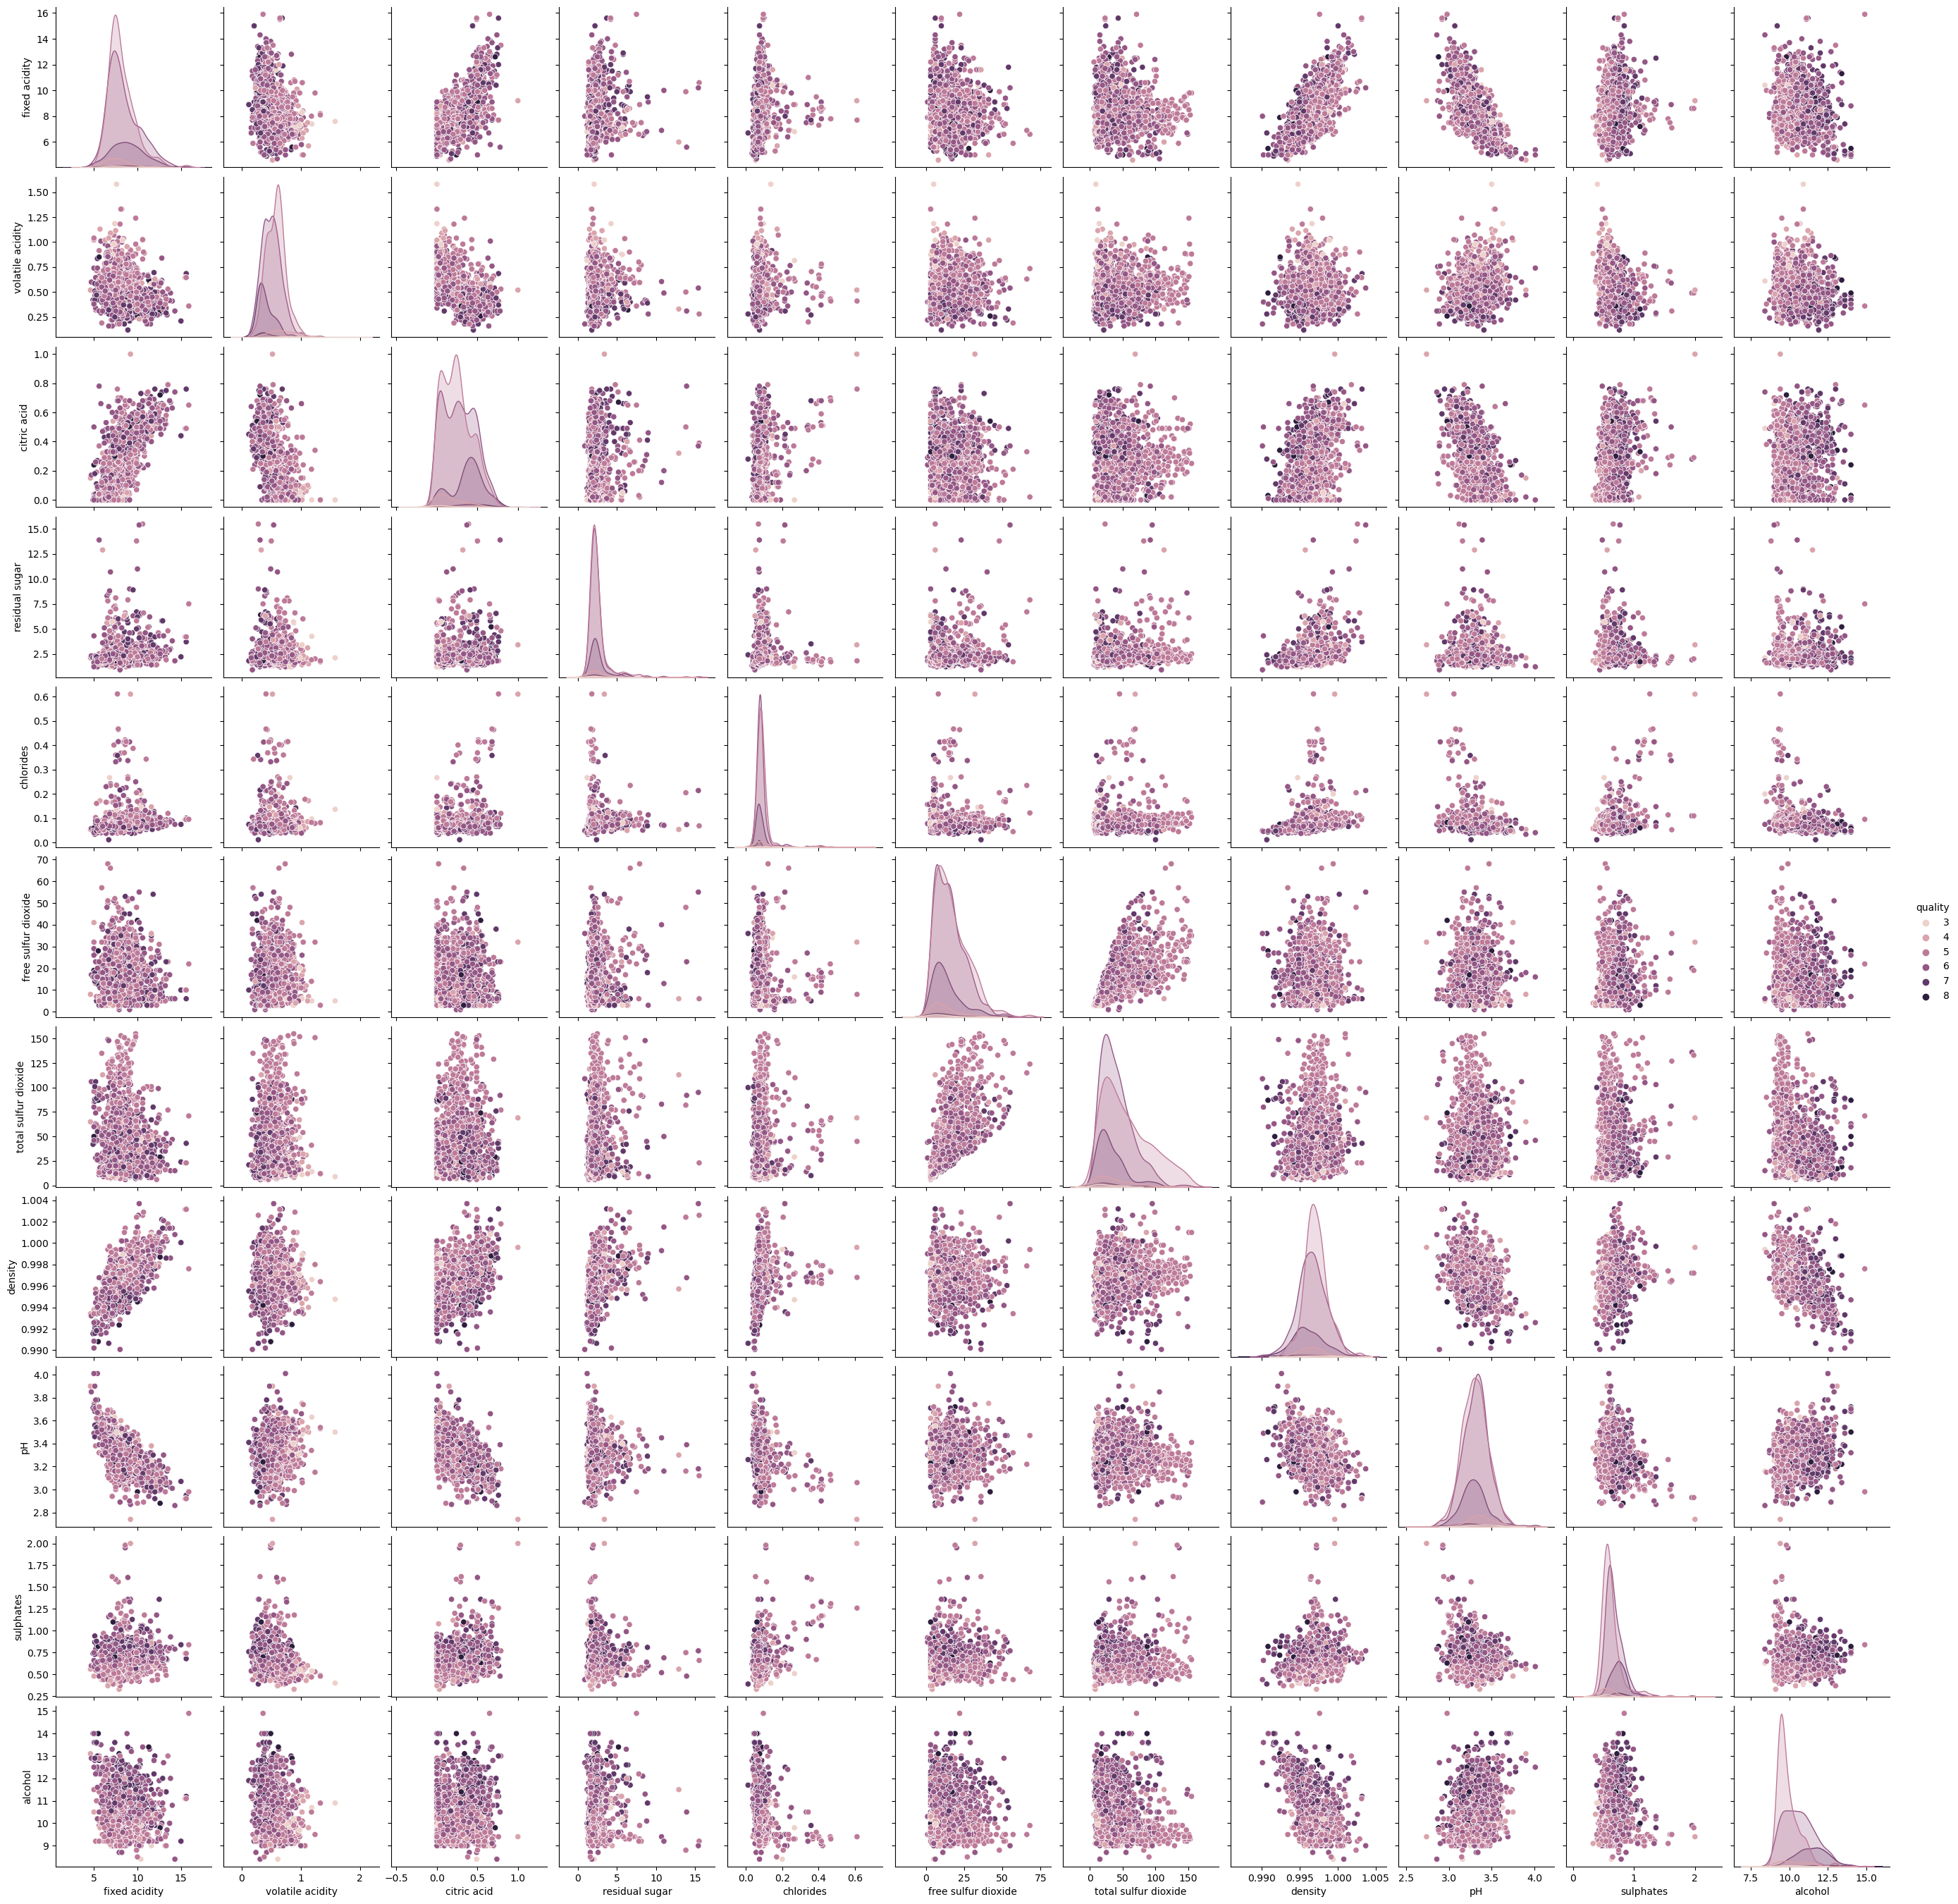

In [18]:
# Plot pairwise relationships in the 'data' DataFrame and color the points based on the 'quality' variable
sns.pairplot(data, hue="quality")

# Display the plot
plt.show()

<font size=4 face="WildWest">Pie chart</font>

In [19]:
data.quality.value_counts()

5    681
6    636
7    197
4     53
8     18
3     10
Name: quality, dtype: int64

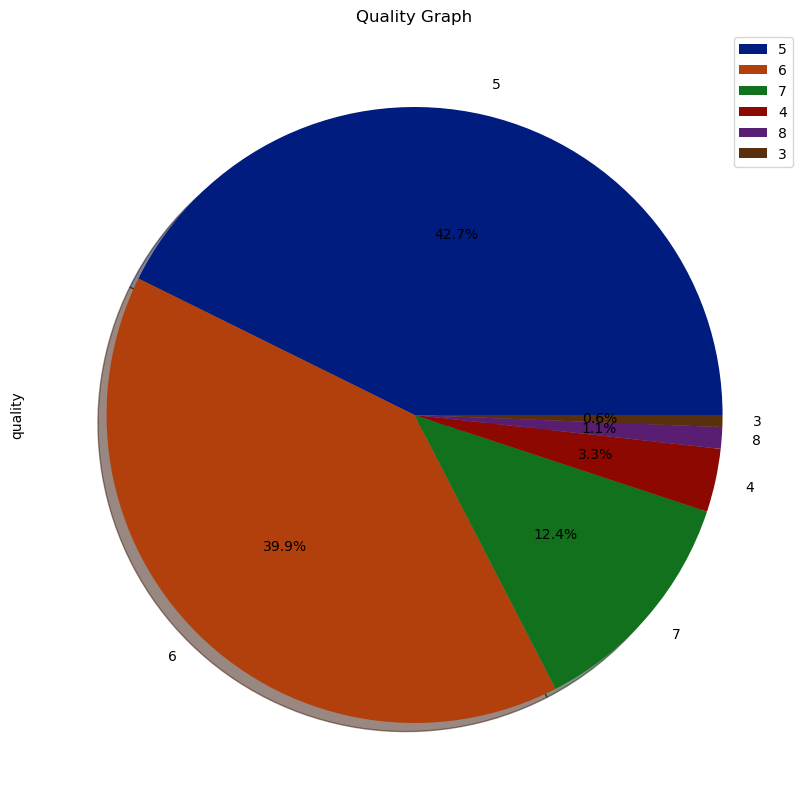

In [20]:
# Create a pie chart to visualize the distribution of values in the 'quality' column of the 'data' DataFrame
data.quality.value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(10, 10))

# Add a title for the graph
plt.title('Quality Graph')

#To add a list of explanation for each wedge
plt.legend()

# Display the pie chart
plt.show()

<font size="4" face="WildWest">2. Statistical Summary</font>

In [21]:
# Show the description of dataset
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1595.000000       1595.000000  1595.000000     1595.000000   
mean        8.323072          0.528455     0.270395        2.525486   
std         1.741272          0.178825     0.194478        1.369760   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

        chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1595.00000          1595.000000           1595.000000  1595.000000   
mean      0.08754            15.797179             46.025078     0.996754   
std       0.04710            10.331508             31.578292     0.001880   
min       0.01200             1.000000              

<font size="4" face="WildWest">3. Correlation Analysis</font>

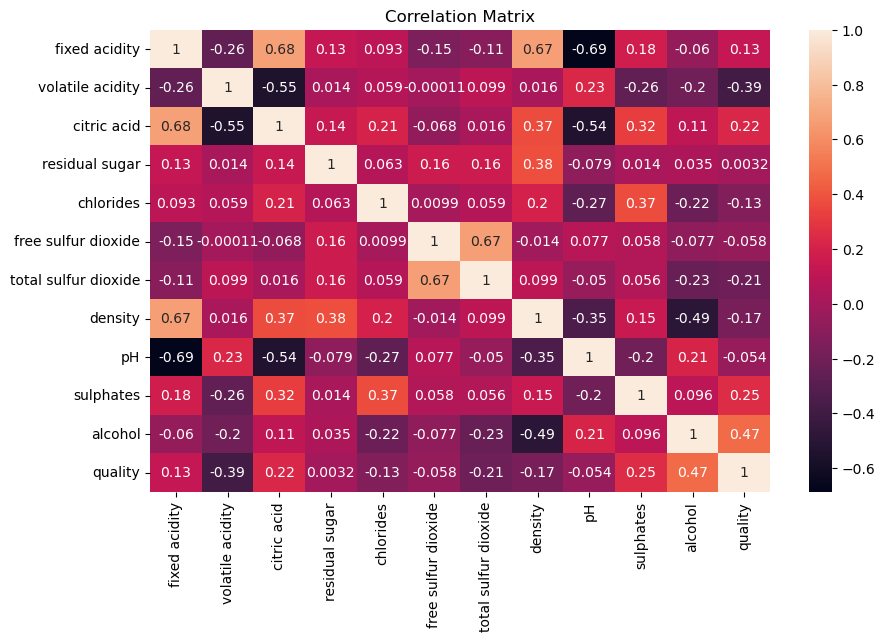

In [22]:
# Correlation analysis
# Calculate the correlation matrix of the 'data' DataFrame
correlation = data.corr()

# Set the figure size for the heatmap plot
plt.figure(figsize=(10, 6))

# Create a heatmap using seaborn (sns) to visualize the correlation matrix
# The 'annot' parameter displays the correlation values in each cell
sns.heatmap(correlation, annot=True)

# Set the title of the heatmap plot
plt.title("Correlation Matrix")

# Display the heatmap plot
plt.show()

# <font color=#4863A0> Data Preprocessing 👨‍💻</font>
It involves *preparing* and *transforming raw data* into a suitable format for analysis and **model training**. Effective data processing ensures that the machine learning algorithms can extract meaningful patterns and make accurate predictions, includes:
- Splitting the Dataset
- Scaling or Normalizing the Features
- Encoding Categorical Variables

In [23]:
# Split the data into features (X) and target variable (Y)
X = data.drop('quality',axis=1)

# Create a new series 'Y' by applying a lambda function to the 'quality' column of the 'data' DataFrame
# The lambda function assigns a value of 1 if the 'quality' value is greater than or equal to 5, otherwise assigns 0
Y = data['quality'].apply(lambda y_value: 1 if y_value >= 5 else 0)

# Print the shapes of X and Y to verify the splitting
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (1595, 11)
Shape of Y: (1595,)


In [24]:
# Rescale and normalize the features
'''
# Standardization (Normalization)
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
'''

# Min-Max Scaling (Rescaling)
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

#I will choose one of them in the future part "model selection" based on the highest accuracy

# <font color=#4863A0> Model Selection 🧩</font>
Model selection is an essential step in machine learning that involves choosing **the most appropriate model for a given problem**. The goal of model selection is to find a model that generalizes well to unseen data and provides the best performance on the task at hand.

- Split the data into training and testing sets.
- Choosing the Machine Learning Algorithm.
    1. Random Forest Classifier (Model Selection)  
- Training the Model.

In [25]:
# Split the data into training and testing sets
# X: Features, Y: Target variable
# test_size=0.2 specifies that 20% of the data will be used for testing and 80% for training
# random_state=0 sets the random seed for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=44)

# Print the shapes of the training and testing sets to verify the splitting
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (1276, 11)
Shape of X_test: (319, 11)
Shape of Y_train: (1276,)
Shape of Y_test: (319,)


In [26]:
# Random Forest Classifier Parameters
'''
sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', 
                                        max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                        min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, 
                                        min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                        n_jobs=None, random_state=None, verbose=0, 
                                        warm_start=False, class_weight=None, ccp_alpha=0.0, 
                                        max_samples=None, monotonic_cst=None)
'''

# n_estimators (The number of trees in the forest"عدد الاشجار في الغابة")
# max_depth (The maximum depth of the tree.)
# random_state (Controls both the randomness of the bootstrapping of the samples used when building trees)

# Initialize lists to store training and testing accuracies
scoreListRF_Train = []
scoreListRF_Test = []

'''
max_dep      ----------> (1, 5),(1, 10) 
rand_state   ----------> (1, 35),(1, 50)
n_est        ----------> (1, 30),(1, 30)
'''

# Iterate over different values of max_depth
for max_dep in range(1, 5):
    # Iterate over different values of random_state
    for rand_state in range(1, 20):
        # Iterate over different values of n_estimators
        for n_est in range(1, 15):
            # Create a Random Forest model with the different values of max_depth, random_state, and n_estimators
            Model = RandomForestClassifier(n_estimators=n_est, random_state=rand_state, max_depth=max_dep)            
            
            # Fit the model on the training data
            Model.fit(X_train, Y_train)
            
            # Calculate and store the training accuracy
            scoreListRF_Train.append(Model.score(X_train, Y_train))
            
            # Calculate and store the testing accuracy
            scoreListRF_Test.append(Model.score(X_test, Y_test))

# Find the maximum accuracy for both training and testing
RF_Accuracy_Train = max(scoreListRF_Train) 
RF_Accuracy_Test = max(scoreListRF_Test)

# Print the best accuracies achieved
print(f"Random Forest best accuracy (Training): {RF_Accuracy_Train*100:.2f}%")
print(f"Random Forest best accuracy (Testing): {RF_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The Random Forest model has been trained successfully","green", attrs=['reverse']))

Random Forest best accuracy (Training): 97.02%
Random Forest best accuracy (Testing): 96.55%
The Random Forest model has been trained successfully
